In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
from dataset import Dataset

In [3]:
os.chdir('../')

In [4]:
data = Dataset(split_threshold=0.2, batch_size=32)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Found 870 files belonging to 29 classes.


In [5]:
data.preprocess(resize=True)

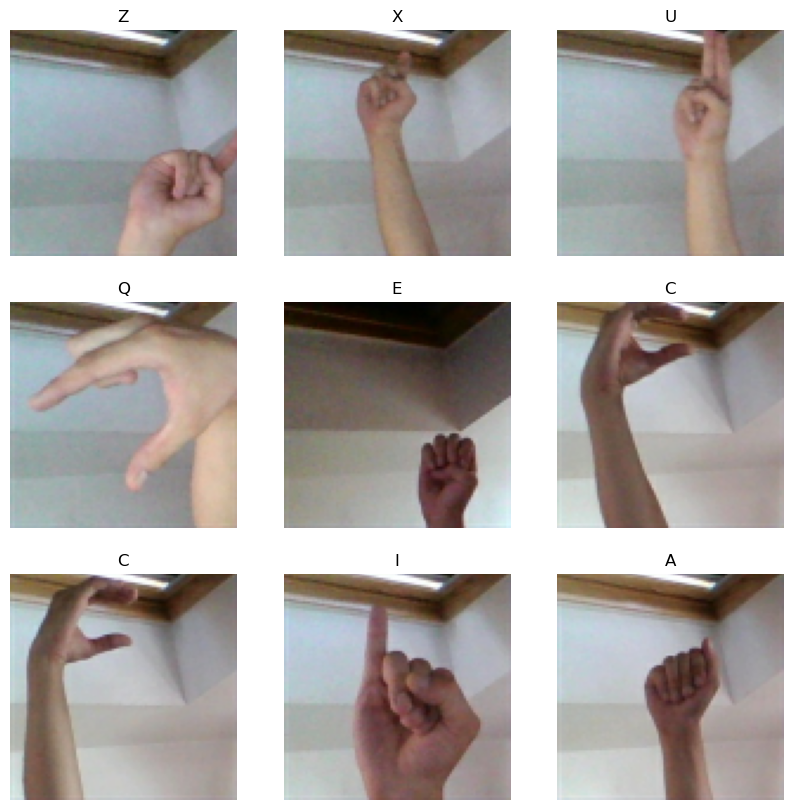

In [6]:
data.visualize_images('train')

In [7]:
data.export('train', 'data/train_preprocessed')

69600it [00:39, 1779.54it/s]

Saving complete.
